## Classification of text

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./TextFiles/smsspamcollection.tsv', sep = '\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [9]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

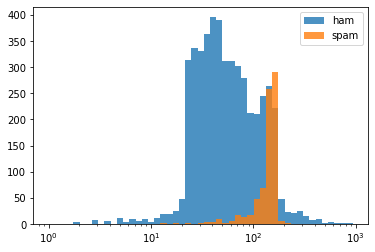

In [12]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

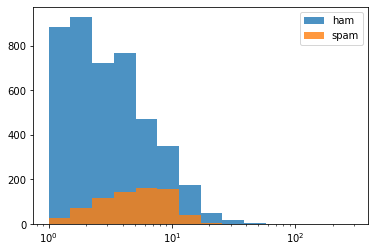

In [13]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [15]:
X = df[['length', 'punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Training data
X_train.shape

(3900, 2)

In [19]:
# testing data
X_test.shape

(1672, 2)

In [20]:
X_test

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
2505,160,10
2525,99,5
4975,62,5
650,97,11


In [21]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr_model = LogisticRegression(solver = 'lbfgs')

In [27]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
from sklearn import metrics

In [29]:
predictions = lr_model.predict(X_test)

In [30]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [31]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [32]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [33]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


### Text Feature Extraction

In [35]:
df = pd.read_csv('./TextFiles/moviereviews.tsv', sep = '\t')

In [36]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [37]:
len(df)

2000

In [39]:
df['review'][0]

'how do films like mouse hunt get into theatres ? \r\nisn\'t there a law or something ? \r\nthis diabolical load of claptrap from steven speilberg\'s dreamworks studio is hollywood family fare at its deadly worst . \r\nmouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . \r\nwriter adam rifkin and director gore verbinski are the names chiefly responsible for this swill . \r\nthe plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . \r\ndeciding to check out the long-abandoned house , they soon learn that it\'s worth a fortune and set about selling it in auction to the highest bidder . \r\nbut battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . \r\

In [40]:
## Check for missing values
df.isnull().sum()

label      0
review    35
dtype: int64

In [41]:
df.dropna(inplace = True)

In [42]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [43]:
len(df)

1965

In [44]:
## Remove empty string

In [45]:
blanks = []

for i, lb, rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [46]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [47]:
df.drop(blanks, inplace = True)

In [48]:
len(df)

1938

In [49]:
# 
X = df['review']
y = df['label']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [52]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC())])

In [53]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [54]:
predictions = text_clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [56]:
print(confusion_matrix(y_test, predictions))

[[235  47]
 [ 41 259]]


In [57]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



In [58]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

In [59]:
import spacy

In [62]:
nlp = spacy.load('en_core_web_lg')

In [63]:
nlp(u"lion").vector

array([ 1.8963e-01, -4.0309e-01,  3.5350e-01, -4.7907e-01, -4.3311e-01,
        2.3857e-01,  2.6962e-01,  6.4332e-02,  3.0767e-01,  1.3712e+00,
       -3.7582e-01, -2.2713e-01, -3.5657e-01, -2.5355e-01,  1.7543e-02,
        3.3962e-01,  7.4723e-02,  5.1226e-01, -3.9759e-01,  5.1333e-03,
       -3.0929e-01,  4.8911e-02, -1.8610e-01, -4.1702e-01, -8.1639e-01,
       -1.6908e-01, -2.6246e-01, -1.5983e-02,  1.2479e-01, -3.7276e-02,
       -5.7125e-01, -1.6296e-01,  1.2376e-01, -5.5464e-02,  1.3244e-01,
        2.7519e-02,  1.2592e-01, -3.2722e-01, -4.9165e-01, -3.5559e-01,
       -3.0630e-01,  6.1185e-02, -1.6932e-01, -6.2405e-02,  6.5763e-01,
       -2.7925e-01, -3.0450e-03, -2.2400e-02, -2.8015e-01, -2.1975e-01,
       -4.3188e-01,  3.9864e-02, -2.2102e-01, -4.2693e-02,  5.2748e-02,
        2.8726e-01,  1.2315e-01, -2.8662e-02,  7.8294e-02,  4.6754e-01,
       -2.4589e-01, -1.1064e-01,  7.2250e-02, -9.4980e-02, -2.7548e-01,
       -5.4097e-01,  1.2823e-01, -8.2408e-02,  3.1035e-01, -6.33

In [64]:
## Sentiment Analysis using VADER

In [66]:
import nltk

In [67]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/oghenevwedeagboro-jimoh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [69]:
sid = SentimentIntensityAnalyzer()

In [70]:
a = 'This ia a good movie'

In [71]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [72]:
a = "This was the best, most awesome movie EVER MADE!!!"

In [73]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

In [74]:
a = "This was the worst movies that has ever disgraced the screen."

In [75]:
sid.polarity_scores(a)

{'neg': 0.441, 'neu': 0.559, 'pos': 0.0, 'compound': -0.7964}

In [76]:
import pandas as pd

In [77]:
df = pd.read_csv('./TextFiles/amazonreviews.tsv', sep = '\t')

In [78]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [79]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [80]:
df.dropna(inplace = True)

In [82]:
blanks = []
for i, lb, rv in df.itertuples():
    
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)


In [83]:
blanks

[]

In [84]:
df.iloc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [85]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [86]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [87]:
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [88]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [89]:
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [91]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [92]:
df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
accuracy_score(df['label'], df['comp_score'])

0.7091

In [95]:
print(classification_report(df['label'], df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [96]:
print(confusion_matrix(df['label'], df['comp_score']))

[[2622 2475]
 [ 434 4469]]


In [97]:
### Sentiment Analysis Project

In [98]:
df = pd.read_csv('./TextFiles/moviereviews.tsv', sep='\t')

In [99]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [100]:
df.dropna(inplace = True)

In [101]:
blanks = []
for i, lb, rv in df.itertuples():
    
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

In [102]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [103]:
df.drop(blanks, inplace = True)

In [104]:
df['label'].value_counts()

pos    969
neg    969
Name: label, dtype: int64

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [106]:
sid = SentimentIntensityAnalyzer()

In [107]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [108]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [109]:
df.head()

,label,review,scores,compound
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484


In [110]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [111]:
df.head()

,label,review,scores,compound,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...",0.9951,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...",-0.2484,neg


In [112]:
accuracy_score(df['label'], df['comp_score'])

0.6357069143446853

In [113]:
print(classification_report(df['label'], df['comp_score']))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

    accuracy                           0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [114]:
print(confusion_matrix(df['label'], df['comp_score']))

[[427 542]
 [164 805]]
